In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [5]:
df=pd.read_csv('C:/Users/User/Documents/shopping_trends_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [31]:
df.drop(column=['Gender'],axis=1)

TypeError: DataFrame.drop() got an unexpected keyword argument 'column'

In [6]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [23]:
num_rows, num_columns = df.shape

In [24]:
#checking the dimensions
print("Number of rows :", num_rows)
print("number of columns :", num_columns)

Number of rows : 3900
number of columns : 18


In [8]:
# X=df.drop('Size',axis=1)
# Y=df['Size']
           

In [11]:
list(df.columns)

['Customer ID',
 'Age',
 'Gender',
 'Item Purchased',
 'Category',
 'Purchase Amount (USD)',
 'Location',
 'Size',
 'Color',
 'Season',
 'Review Rating',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Previous Purchases',
 'Payment Method',
 'Frequency of Purchases']

In [25]:
X = df.drop('Purchase Amount (USD)',axis=1)
Y = df['Purchase Amount (USD)']

categorical_cols = ['Customer ID',
 'Age',
 'Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Review Rating',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Previous Purchases',
 'Payment Method',
 'Frequency of Purchases']
encoder=OneHotEncoder(sparse=False)
# # Concatenate the encoded categorical columns with the remaining numerical columns
# X_final = pd.concat([X.drop(categorical_cols, axis=1), X_encoded], axis=1)
X_encoded = encoder.fit_transform(X[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
X_encoded = pd.DataFrame(X_encoded, columns=encoded_cols, index=X.index)

# Concatenate the encoded categorical columns with the remaining numerical columns
X_final = pd.concat([X.drop(categorical_cols, axis=1), X_encoded], axis=1)
print(X_final,Y)


      Customer ID_1  Customer ID_2  Customer ID_3  Customer ID_4  \
0               1.0            0.0            0.0            0.0   
1               0.0            1.0            0.0            0.0   
2               0.0            0.0            1.0            0.0   
3               0.0            0.0            0.0            1.0   
4               0.0            0.0            0.0            0.0   
...             ...            ...            ...            ...   
3895            0.0            0.0            0.0            0.0   
3896            0.0            0.0            0.0            0.0   
3897            0.0            0.0            0.0            0.0   
3898            0.0            0.0            0.0            0.0   
3899            0.0            0.0            0.0            0.0   

      Customer ID_5  Customer ID_6  Customer ID_7  Customer ID_8  \
0               0.0            0.0            0.0            0.0   
1               0.0            0.0            0

C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


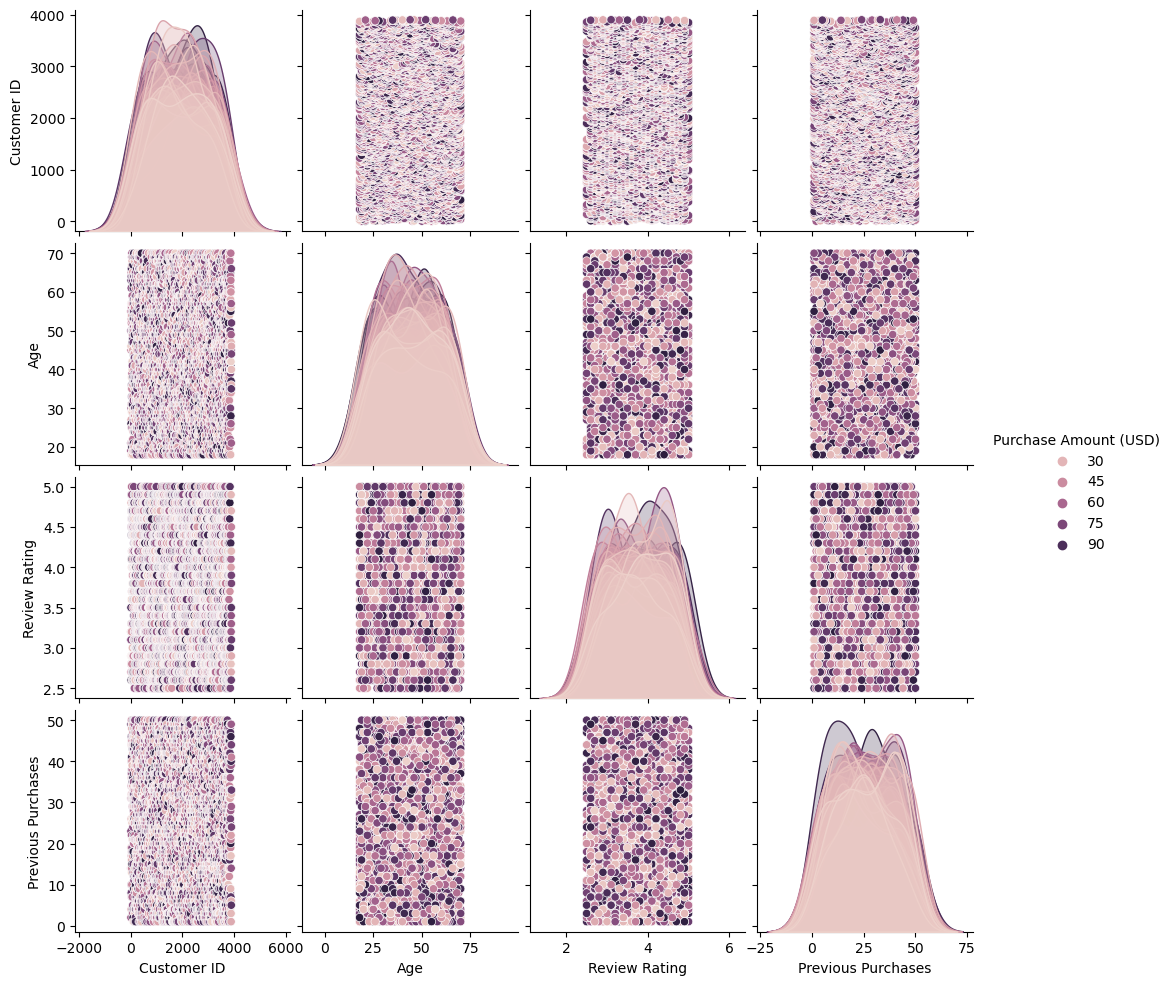

ValueError: could not convert string to float: 'Male'

In [26]:
# Let's explore the dataset by visualizing the distributions and relationships between variables
sns.pairplot(df, hue='Purchase Amount (USD)')
plt.show()

# Correlation Heatmap
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [27]:
rf_regressor = RandomForestRegressor()

# Fit the model to your training data
rf_regressor.fit(X, Y)  # X contains your features, y is the target variable

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a list of feature names
feature_names = X.columns  # Assuming X is a DataFrame with columns representing features

# Print feature importances
for feature, importance in zip(feature_names, feature_importances):
    print(f'{feature}: {importance}')

ValueError: could not convert string to float: 'Male'